# 패션MNIST 모델 수정 
    - one. 32 Conv2D layer 의 커널사이즈 변경. 2by2 및 4by4
    - two. MaxPooling2D layer 의 pollingsize 변경
        - 풀링방식 변경 test 로  Average Pooling2D   size 2,2 변경.
    - three. Dropout(0.5) 변화.  None 및 0.25

### 결론-1

- 레이어를 하나씩 더해가는 방식보다. 원본 + 1 방식으로 조금이나마 내부적으로 뭘하고 있는지 알고 싶다.
- 오래 돌리기 전략을 취해 보려 했으나, 1분이상 돌린 코드는 없었다. 커널 사이즈를 2,2로 가져가면 조금 오래 걸리지 않을까 기대했던 생각. 

    - 커널사이즈 2,2 및 4,4, 버전의 정확도 향상은 없었다.
    - 맥스풀링사이즈 3,3 변화에서는 성능향상. 
    - 드롭아웃 변화 두가지 버전에서의 성능향상은 없었다. 
    - 

- total 버전 맥스풀링3,3 및 드롭아웃 0.4 버전에서도, 맥스풀링 3.3의 성능을 뛰어넘진 못했다. 


### 결론-2 정확도 비교

- 1.1 model_one  커널사이즈 (2,2)
    - 결과 0.9239000082015991 정확도 , 하락.
- 1.2 model_one44  커널사이즈 (4,4)
    - 결과 0.9193000197410583 정확도 , 하락

- 2.1 model_two 맥스풀링 사이즈 3,3
    - 결과 0.9283000230789185 정확도 향상. (유일한 향상.)
- 2.2 model_two_Avgpooling 에버리지 풀링 사이즈 2,2 
    - 결과 0.9269000291824341 정확도 하락

- 3.1 model_three_drop_none
    - 결과 0.9211999773979187 정확도 하락
- 3.2 model_three_drop_small
    - 결과 0.9179999828338623 정확도 하락.

- 모델 토탈. 



In [10]:
# 모델_one
model_one = Sequential([
    Conv2D(32, (2,2), input_shape=(28,28,1), activation='relu'),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(), # 기본 2 by 2     
    Dropout(0.25),
    Flatten(),           # n차원을 1차원으로 반환 Dense 들어가기 전 단계에서 필요해
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
    ])
model_one.summary()
# 첫번째 conv2d (Conv2D)   (None, 27, 27, 32)    160  파라미터 갯수 기존320 ->160 으로 줄어듦.

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 27, 27, 32)        160       
                                                                 
 conv2d_1 (Conv2D)           (None, 25, 25, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 12, 12, 64)        0         
                                                                 
 flatten (Flatten)           (None, 9216)              0         
                                                                 
 dense (Dense)               (None, 512)               4719104   
                                                        

In [12]:
model_one.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [13]:
model_path = 'best-fashion-mnist-cnn.c5'
checkpoint = ModelCheckpoint(model_path, save_best_only=True, verbose=1)  # 밸로스가 기본. 모니터로 등록
early_stop = EarlyStopping(patience=10)

In [ ]:
hist = model_one.fit(
    X_train, Y_train, validation_split=0.2, batch_size=200, epochs=100,
    callbacks=[checkpoint, early_stop], verbose=0    
)
# 상황을 보아하니 patience=5 으로도 괜찮겠다.

In [17]:
best_model = load_model(model_path)
best_model.evaluate(X_test, Y_test)
# [0.21558497846126556, 0.9259999990463257] origin
# [0.2215682417154312, 0.9239000082015991] 커널사이즈(2,2) 성능하락.

313/313 [==============================] - 1s 3ms/step - loss: 0.2216 - accuracy: 0.9239


[0.2215682417154312, 0.9239000082015991]

In [22]:
model_one44 = Sequential([
    Conv2D(32, (4,4), input_shape=(28,28,1), activation='relu'),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(), # 기본 2 by 2     
    Dropout(0.25),
    Flatten(),           # n차원을 1차원으로 반환 Dense 들어가기 전 단계에서 필요해
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
    ])
model_one44.summary()
# 첫째층의 파라미터 개수 320 - > 540 으로 증가

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 25, 25, 32)        544       
                                                                 
 conv2d_9 (Conv2D)           (None, 23, 23, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 11, 11, 64)       0         
 2D)                                                             
                                                                 
 dropout_8 (Dropout)         (None, 11, 11, 64)        0         
                                                                 
 flatten_4 (Flatten)         (None, 7744)              0         
                                                                 
 dense_8 (Dense)             (None, 512)               3965440   
                                                      

In [23]:
model_one44.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [24]:
model_path = 'best-fashion-mnist-cnn.c5'
checkpoint = ModelCheckpoint(model_path, save_best_only=True, verbose=1) 
early_stop = EarlyStopping(patience=5)

In [ ]:
hist = model_one44.fit(
    X_train, Y_train, validation_split=0.2, batch_size=200, epochs=100,
    callbacks=[checkpoint, early_stop], verbose=0    
)

In [27]:
best_model = load_model(model_path)
best_model.evaluate(X_test, Y_test)
# [0.21558497846126556, 0.9259999990463257] origin
# [0.2215682417154312, 0.9239000082015991] 커널사이즈(2,2) 성능하락.
# [0.2257489562034607, 0.9193000197410583] 커널사이즈(4,4) 성능하락. 

313/313 [==============================] - 1s 3ms/step - loss: 0.2257 - accuracy: 0.9193


[0.2257489562034607, 0.9193000197410583]

In [32]:
model_two = Sequential([
    Conv2D(32, (3,3), input_shape=(28,28,1), activation='relu'),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(pool_size=(3,3)), # 기본 2 by 2     
    Dropout(0.25),
    Flatten(),           # n차원을 1차원으로 반환 Dense 들어가기 전 단계에서 필요해
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
    ])
model_two.summary()
# 플래튼 이후 덴스의 파라미터 개수가 절반이하로 줄어버렸다.

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 conv2d_15 (Conv2D)          (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                             
                                                                 
 dropout_14 (Dropout)        (None, 8, 8, 64)          0         
                                                                 
 flatten_7 (Flatten)         (None, 4096)              0         
                                                                 
 dense_14 (Dense)            (None, 512)               2097664   
                                                      

In [33]:
model_two.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [34]:
model_path = 'best-fashion-mnist-cnn.c5'
checkpoint = ModelCheckpoint(model_path, save_best_only=True, verbose=1)  # 밸로스가 기본. 모니터로 등록
early_stop = EarlyStopping(patience=5)

In [ ]:
hist = model_two.fit(
    X_train, Y_train, validation_split=0.2, batch_size=200, epochs=100,
    callbacks=[checkpoint, early_stop], verbose=0    
)

In [36]:
best_model = load_model(model_path)
best_model.evaluate(X_test, Y_test)
# [0.21558497846126556, 0.9259999990463257] origin 
# [0.2088153064250946, 0.9283000230789185] 3,3 Maxpooling 향상.

313/313 [==============================] - 1s 3ms/step - loss: 0.2088 - accuracy: 0.9283


[0.2088153064250946, 0.9283000230789185]

In [39]:
from tensorflow.keras.layers import AveragePooling2D
# 레이어 의 에버리지 풀링2D를 선택했다. 풀링방식의 차이는 알지만, 
# 결과의 차이는 탐구가 필요. 만약 성능이 향상된다면 왜 인지 알아보겠다. 

In [40]:
model_two_avgpool = Sequential([
    Conv2D(32, (3,3), input_shape=(28,28,1), activation='relu'),
    Conv2D(64, (3,3), activation='relu'),
    AveragePooling2D(),  # 기본 2by 2
        # MaxPooling2D(), # 기본 2 by 2     
    Dropout(0.25),
    Flatten(),           # n차원을 1차원으로 반환 Dense 들어가기 전 단계에서 필요해
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
    ])
model_two_avgpool.summary()
# 풀링 사이즈 2by2 적용 때문에 맥스풀링과 비교해 파라미터 차이는 없음.
# 오리진과 비교해 쉐입차이도 없다 (None, 12, 12, 64) 

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 conv2d_19 (Conv2D)          (None, 24, 24, 64)        18496     
                                                                 
 average_pooling2d (AverageP  (None, 12, 12, 64)       0         
 ooling2D)                                                       
                                                                 
 dropout_16 (Dropout)        (None, 12, 12, 64)        0         
                                                                 
 flatten_8 (Flatten)         (None, 9216)              0         
                                                                 
 dense_16 (Dense)            (None, 512)               4719104   
                                                      

In [41]:
model_two_avgpool.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [42]:
model_path = 'best-fashion-mnist-cnn.c5'
checkpoint = ModelCheckpoint(model_path, save_best_only=True, verbose=1)  # 밸로스가 기본. 모니터로 등록
early_stop = EarlyStopping(patience=5)

In [ ]:
hist = model_two_avgpool.fit(
    X_train, Y_train, validation_split=0.2, batch_size=200, epochs=100,
    callbacks=[checkpoint, early_stop], verbose=0    
)

In [44]:
best_model = load_model(model_path)
best_model.evaluate(X_test, Y_test)
# 웬지 오래걸린다. 
# [0.21558497846126556, 0.9259999990463257] origin 
# [0.2167196273803711, 0.9269000291824341] 오리진과 비교해 조금 향상.

313/313 [==============================] - 1s 3ms/step - loss: 0.2167 - accuracy: 0.9269


[0.2167196273803711, 0.9269000291824341]

In [45]:
model_three_drop_none = Sequential([
    Conv2D(32, (3,3), input_shape=(28,28,1), activation='relu'),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(), # 기본 2 by 2     
    Dropout(0.25),
    Flatten(),           # n차원을 1차원으로 반환 Dense 들어가기 전 단계에서 필요해
    Dense(512, activation='relu'),
        # Dropout(0.5),
    Dense(10, activation='softmax')
    ])
model_three_drop_none.summary()
# 출력층 전의 드롭아웃층이 사라졌다. 과적합이 나타나는 지 주의 하며 
# 얼리 스탑되는 에포크 횟수가 변하는지 , 혹시 모르니 patience = 10

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 conv2d_21 (Conv2D)          (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 12, 12, 64)       0         
 2D)                                                             
                                                                 
 dropout_18 (Dropout)        (None, 12, 12, 64)        0         
                                                                 
 flatten_9 (Flatten)         (None, 9216)              0         
                                                                 
 dense_18 (Dense)            (None, 512)               4719104   
                                                      

In [46]:
model_three_drop_none.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [47]:
model_path = 'best-fashion-mnist-cnn.c5'
checkpoint = ModelCheckpoint(model_path, save_best_only=True, verbose=1)  # 밸로스가 기본. 모니터로 등록
early_stop = EarlyStopping(patience=10)

In [ ]:
hist = model_three_drop_none.fit(
    X_train, Y_train, validation_split=0.2, batch_size=200, epochs=100,
    callbacks=[checkpoint, early_stop], verbose=0    
)
# 그전의 종료 된 에폭 횟수를 보면 patience 5 에서 17번 정도. 

In [49]:
best_model = load_model(model_path)
best_model.evaluate(X_test, Y_test)
# [0.21558497846126556, 0.9259999990463257] origin 
# [0.22971689701080322, 0.9211999773979187] dorp out (0.5) 제거. 하락.


313/313 [==============================] - 1s 3ms/step - loss: 0.2297 - accuracy: 0.9212


[0.22971689701080322, 0.9211999773979187]

In [51]:
model_three_drop_small = Sequential([
    Conv2D(32, (3,3), input_shape=(28,28,1), activation='relu'),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(), # 기본 2 by 2     
    Dropout(0.25),
    Flatten(),           # n차원을 1차원으로 반환 Dense 들어가기 전 단계에서 필요해
    Dense(512, activation='relu'),
    Dropout(0.25),      # 0.25변경
    Dense(10, activation='softmax')
    ])
model_three_drop_small.summary() 
# 얼리 스탑되는 에포크 횟수가 변하는지 , 혹시 모르니 patience = 10

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_22 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 conv2d_23 (Conv2D)          (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 12, 12, 64)       0         
 2D)                                                             
                                                                 
 dropout_19 (Dropout)        (None, 12, 12, 64)        0         
                                                                 
 flatten_10 (Flatten)        (None, 9216)              0         
                                                                 
 dense_20 (Dense)            (None, 512)               4719104   
                                                     

In [52]:
model_three_drop_small.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [53]:
model_path = 'best-fashion-mnist-cnn.c5'
checkpoint = ModelCheckpoint(model_path, save_best_only=True, verbose=1)  # 밸로스가 기본. 모니터로 등록
early_stop = EarlyStopping(patience=10)

In [ ]:
hist = model_three_drop_small.fit(
    X_train, Y_train, validation_split=0.2, batch_size=200, epochs=100,
    callbacks=[checkpoint, early_stop], verbose=0    
)

In [55]:
best_model = load_model(model_path)
best_model.evaluate(X_test, Y_test)
# [0.21558497846126556, 0.9259999990463257] origin 
# [0.22791101038455963, 0.9179999828338623] 성능하락. 

313/313 [==============================] - 1s 3ms/step - loss: 0.2279 - accuracy: 0.9180


[0.22791101038455963, 0.9179999828338623]

성능이 좋았던 변경점을 합쳐서 다시 한번 최종 피팅. 
Maxpooling(pooling size = (3,3)) 만 유일하게 성능향상. 변경점이 하나이므로, 드롭아웃 조금 변경하여 피팅.

1. 커널사이즈 2,2 와 4, 4 둘다 하락. 3,3으로 유지
2. Maxpooling(pooling size = (3,3)) 만 유일하게 성능향상.
3. dropout 0.5 layer를 0.4으로 수정. 

결과. maxpooling3.3 보다 못한 결과로 피팅.  
0.9282000064849854


In [62]:
model_total = Sequential([
    Conv2D(32, (3,3), input_shape=(28,28,1), activation='relu'),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(pool_size=(3,3)), # 기본 2 by 2     
    Dropout(0.25),
    Flatten(),          
    Dense(512, activation='relu'),
    Dropout(0.4),
    Dense(10, activation='softmax')
    ])
model_total.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_26 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 conv2d_27 (Conv2D)          (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 8, 8, 64)         0         
 g2D)                                                            
                                                                 
 dropout_23 (Dropout)        (None, 8, 8, 64)          0         
                                                                 
 flatten_12 (Flatten)        (None, 4096)              0         
                                                                 
 dense_24 (Dense)            (None, 512)               2097664   
                                                     

In [63]:
model_total.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [64]:
model_path = 'best-fashion-mnist-cnn.c5'
checkpoint = ModelCheckpoint(model_path, save_best_only=True, verbose=1) 
early_stop = EarlyStopping(patience=5)

In [65]:
hist = model_total.fit(
    X_train, Y_train, validation_split=0.2, batch_size=200, epochs=100,
    callbacks=[checkpoint, early_stop], verbose=1   
)
# 정확도 향상이 그저 그래보여. 드롭아웃 0.5 버전의 내용보다 .학습 횟수는 높아져

Epoch 1/100
238/240 [============================>.] - ETA: 0s - loss: 0.5237 - accuracy: 0.8120
Epoch 00001: val_loss improved from inf to 0.34343, saving model to best-fashion-mnist-cnn.c5
INFO:tensorflow:Assets written to: best-fashion-mnist-cnn.c5/assets
240/240 [==============================] - 4s 16ms/step - loss: 0.5229 - accuracy: 0.8122 - val_loss: 0.3434 - val_accuracy: 0.8737
Epoch 2/100
236/240 [============================>.] - ETA: 0s - loss: 0.3288 - accuracy: 0.8806
Epoch 00002: val_loss improved from 0.34343 to 0.30057, saving model to best-fashion-mnist-cnn.c5
INFO:tensorflow:Assets written to: best-fashion-mnist-cnn.c5/assets
240/240 [==============================] - 4s 15ms/step - loss: 0.3284 - accuracy: 0.8806 - val_loss: 0.3006 - val_accuracy: 0.8866
Epoch 3/100
239/240 [============================>.] - ETA: 0s - loss: 0.2749 - accuracy: 0.8991
Epoch 00003: val_loss improved from 0.30057 to 0.25236, saving model to best-fashion-mnist-cnn.c5
INFO:tensorflow:Ass

In [66]:
best_model = load_model(model_path)
best_model.evaluate(X_test, Y_test)
# [0.21558497846126556, 0.9259999990463257] origin 
# [0.2088153064250946, 0.9283000230789185] 3.3 맥스풀링  
# [0.21373777091503143, 0.9282000064849854] 3.3 맥스풀링 & 0.4 드롭아웃.

313/313 [==============================] - 1s 3ms/step - loss: 0.2137 - accuracy: 0.9282


[0.21373777091503143, 0.9282000064849854]

# Fashion MNIST - CNN
- 32 Conv2D layer
- 64 Conv2d layer
- MaxPooling2D layer
- Dropout(0.25)
- Flatten
- Fully Connected Network(512) layer
- Dropout(0.5)
- Output(10)

In [1]:
import numpy as np
import tensorflow as tf
seed = 2022
np.random.seed(seed)
tf.random.set_seed(seed)

- 데이터 전처리

In [2]:
from tensorflow.keras.datasets import fashion_mnist
(X_train, y_train), (X_test, y_test)= fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


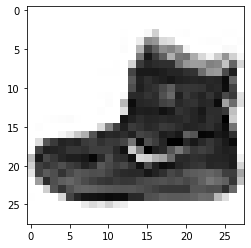

In [3]:
import matplotlib.pyplot as plt

plt.imshow(X_train[0], cmap='Greys')

In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
class_names[y_train[0]]

'Ankle boot'

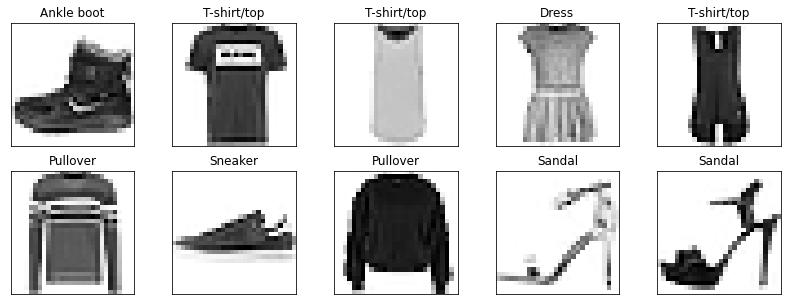

In [5]:
plt.figure(figsize=(14,5))
for i in range(10):    
    plt.subplot(2, 5, i+1)
    plt.imshow(X_train[i], cmap='Greys')
    plt.title(class_names[y_train[i]])
    plt.xticks([]); plt.yticks([])
plt.show()

In [6]:
X_train.shape, y_train.shape # 엠니스트 셋과 동일한 데이터 양 가져

((60000, 28, 28), (60000,))

- 정규화 및 차원

In [7]:
# X data 정규화 및 차원 변경 
# 0 ~ 1 사이의 값으로 정규화 # 학습준비 완료 
X_train = X_train.reshape(-1,28,28,1) / 255.0
X_test  = X_test.reshape(-1, 28, 28, 1) / 255.0

In [8]:
# y data : one - hot encoding
from tensorflow.keras.utils import to_categorical
Y_train = to_categorical(y_train)
Y_test = to_categorical(y_test)

- 모델 정의, 설정, 학습, 평가

In [9]:
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

In [ ]:
model = Sequential([
    Conv2D(32, (3,3), input_shape=(28,28,1), activation='relu'),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(), # 기본 2 by 2     
    Dropout(0.25),
    Flatten(),           # n차원을 1차원으로 반환 Dense 들어가기 전 단계에서 필요해
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
    ])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 12, 12, 64)        0         
                                                                 
 flatten (Flatten)           (None, 9216)              0         
                                                                 
 dense (Dense)               (None, 512)               4719104   
                                                        

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# 모델 최적화를 위한 설정
model_path = 'best-fashion-mnist-cnn.c5'
checkpoint = ModelCheckpoint(model_path, save_best_only=True, verbose=1)  # 밸로스가 기본. 모니터로 등록
early_stop = EarlyStopping(patience=10)

In [ ]:
hist = model.fit(
    X_train, Y_train, validation_split=0.2, batch_size=200, epochs=100,
    callbacks=[checkpoint, early_stop], verbose=0    
)

In [ ]:
best_model = load_model(model_path)
best_model.evaluate(X_test, Y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.2156 - accuracy: 0.9260


[0.21558497846126556, 0.9259999990463257]

- 학습과정 시각화

In [ ]:
y_acc = hist.history['accuracy']
y_vloss = hist.history['val_loss']
xs = np.arange(1, len(y_acc)+1)

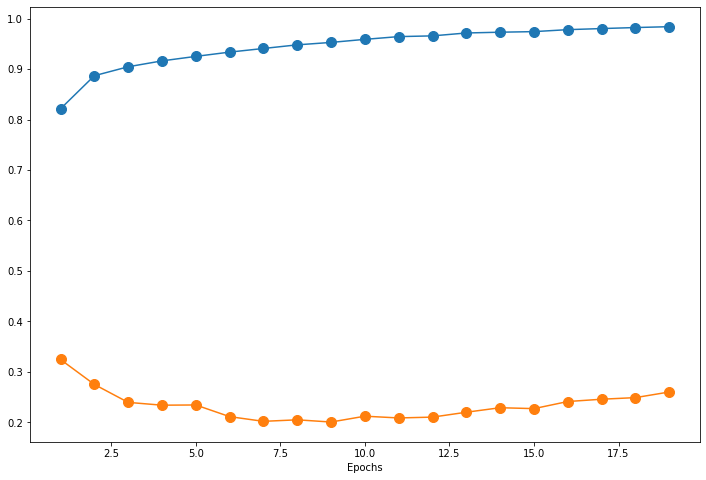

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(xs, y_acc, 'o-', ms=10, label='train_accuracy')
plt.plot(xs, y_vloss, 'o-', ms=10, label='validation_loss')
plt.legend, plt.grid, plt.xlabel('Epochs');